## Step 1: Import Libraries

In [2]:
# This is a Python blockimport os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

2023-07-26 06:51:14.904116: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-26 06:51:16.665723: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-26 06:51:16.666725: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-26 06:51:17.942652: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Step 2: Prepare the Dataset

You'll need a dataset containing images labeled with "eyeglasses" and "no eyeglasses." Make sure you have the dataset organized into separate folders for each class.

In [11]:
!ls /workspaces/codespaces-jupyter/data

with_eyeglasses  without_eyeglasses


In [15]:
preprocess_data_dir = '/workspaces/codespaces-jupyter/output'

In [13]:
dataset_dir = '/workspaces/codespaces-jupyter/data'

In [16]:
print(dataset_dir)
print(preprocess_data_dir)

/workspaces/codespaces-jupyter/data
/workspaces/codespaces-jupyter/output


## Step 3: Load and Preprocess Data

In [18]:
# Set the path to your dataset directory
data_dir = dataset_dir

# Define image size and batch size
img_width, img_height = 150, 150
batch_size = 32

# Use ImageDataGenerator for data augmentation and normalization
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Load and preprocess training data
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

# Load and preprocess validation data
validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

Found 240 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


## Step 3: Load and Preprocess Data, Export files

In [22]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Load and preprocess training data
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='training',
    shuffle=False  # Set shuffle to False to maintain order
)

# Load and preprocess validation data
validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation',
    shuffle=False  # Set shuffle to False to maintain order
)

# Extract data and labels from the generators
train_data = np.concatenate([train_generator.next()[0] for i in range(len(train_generator))])
train_labels = np.concatenate([train_generator.next()[1] for i in range(len(train_generator))])
val_data = np.concatenate([validation_generator.next()[0] for i in range(len(validation_generator))])
val_labels = np.concatenate([validation_generator.next()[1] for i in range(len(validation_generator))])

# Save the preprocessed data and labels to files
np.save(preprocess_data_dir+'/train_data.npy', train_data)
np.save(preprocess_data_dir+'/train_labels.npy', train_labels)
np.save(preprocess_data_dir+'/val_data.npy', val_data)
np.save(preprocess_data_dir+'/val_labels.npy', val_labels)


Found 240 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


## Step 4: Build the CNN Model

In [24]:
# Create the CNN model
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 17, 17, 128)      

## Step 5: Train the Model

In [25]:
# Define the number of training and validation steps per epoch
train_steps_per_epoch = train_generator.samples // batch_size
val_steps_per_epoch = validation_generator.samples // batch_size

# Set the number of training epochs
epochs = 10

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_steps_per_epoch,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=val_steps_per_epoch
)

Epoch 1/10


2023-07-26 06:59:52.864779: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 89718784 exceeds 10% of free system memory.
2023-07-26 06:59:53.199308: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 22429696 exceeds 10% of free system memory.
2023-07-26 06:59:53.214975: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 42467328 exceeds 10% of free system memory.
2023-07-26 06:59:53.448668: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 23970816 exceeds 10% of free system memory.
2023-07-26 06:59:53.509115: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 21233664 exceeds 10% of free system memory.


7/7 [==============================] - 6s 573ms/step - loss: 0.9357 - accuracy: 0.4375 - val_loss: 0.6881 - val_accuracy: 1.0000
Epoch 2/10
7/7 [==============================] - 3s 446ms/step - loss: 0.6947 - accuracy: 0.3798 - val_loss: 0.6975 - val_accuracy: 0.0625
Epoch 3/10
7/7 [==============================] - 3s 424ms/step - loss: 0.6898 - accuracy: 0.5385 - val_loss: 0.6950 - val_accuracy: 0.0625
Epoch 4/10
7/7 [==============================] - 3s 423ms/step - loss: 0.6791 - accuracy: 0.5865 - val_loss: 0.7018 - val_accuracy: 0.0625
Epoch 5/10
7/7 [==============================] - 3s 442ms/step - loss: 0.6641 - accuracy: 0.5357 - val_loss: 0.6774 - val_accuracy: 0.7812
Epoch 6/10
7/7 [==============================] - 3s 456ms/step - loss: 0.6407 - accuracy: 0.6429 - val_loss: 0.6271 - val_accuracy: 0.9062
Epoch 7/10
7/7 [==============================] - 3s 412ms/step - loss: 0.5292 - accuracy: 0.7452 - val_loss: 0.7025 - val_accuracy: 0.6250
Epoch 8/10
7/7 [===============

## Step 6: Evaluate the Model

In [26]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(validation_generator, steps=val_steps_per_epoch)
print(f"Validation Accuracy: {accuracy*100:.2f}%")

1/1 [==============================] - 0s 166ms/step - loss: 0.1813 - accuracy: 1.0000
Validation Accuracy: 100.00%


## ****Step 7: Add new Image

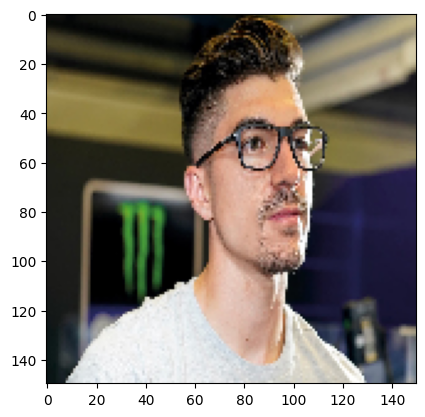

In [30]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
img_width, img_height = 150, 150
img = image.load_img("/workspaces/codespaces-jupyter/test_data/with-glasses-test.jpeg", target_size=(img_width, img_height))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)

In [ ]:
data = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (test_images, test_labels) = data.load_data()

training_images  = training_images / 255.0
test_images = test_images / 255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=20)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

In [ ]:
training_images

## Step 7: Make Predictions

After training and evaluating the model, you can use it to make predictions on new images. Use the model.predict() function to obtain the prediction probabilities for each class. For instance:

In [35]:
# how to prediction with model
prediction = model.predict(img)

print(prediction)

ValueError: Failed to find data adapter that can handle input: <class 'PIL.Image.Image'>, <class 'NoneType'>

In [34]:
# Assuming you have a new image (img) to predict
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Add batch dimension

# Make the prediction
predictions = model.predict(img_array)
probability = predictions[0][0]

# Check if the image contains eyeglasses or not
if probability > 0.5:
    print("Eyeglasses detected!")
else:
    print("No eyeglasses detected.")

1/1 [==============================] - 0s 75ms/step
No eyeglasses detected.


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d822edbe-8d88-4e5f-b475-b8b674ae1c11' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>